# Monitor FAMES
Monitora uma pasta por aquivos Licel, e sempre que um novo arquivo arquivo é encontrado atualiza o grafico

In [1]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


import fames
import fames.files
import fames.report

import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
from IPython import display

import importlib



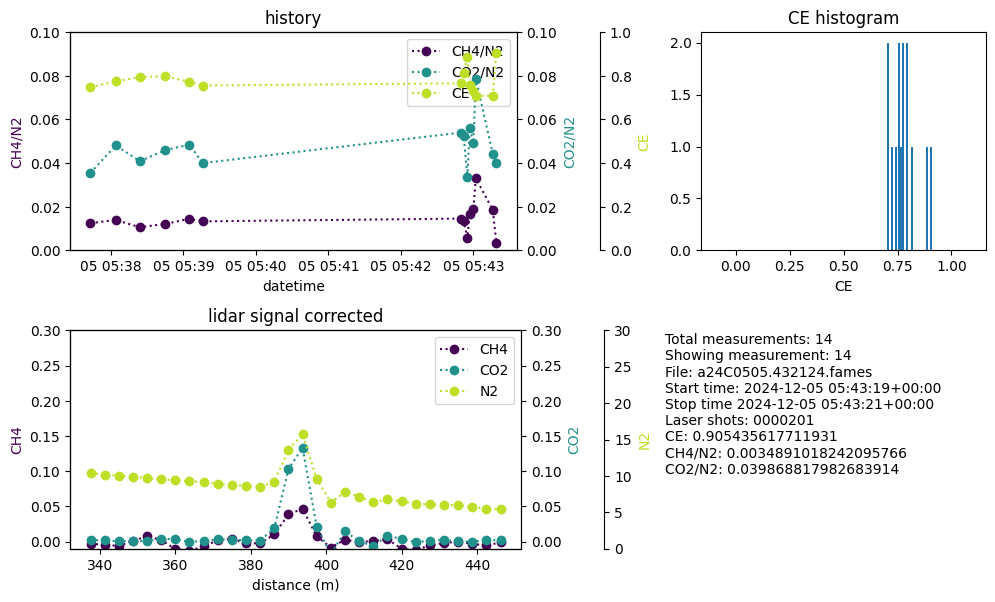

In [2]:
importlib.reload(fames)
importlib.reload(fames.files)
importlib.reload(fames.report)

directory = './data/monitor'
temp_directory = './data/monitor/temp'

files_list = []
processed_files = []

cm = 1/2.54
fig = plt.figure(layout='constrained', figsize=(25*cm, 15*cm))
dashboard = fames.report.create_simple_dashboard(fig)
hdisplay = display.display("", display_id=True)
hdisplay.update(fig)

   
   

try:
   while True: # read infinite loop
   # Procura por novos aquivos
    files = glob.glob(os.path.join(directory,'*'))
    new_file = False
    for file in files:
        if os.path.isfile(file):
            if file not in files_list:
                processed_file = os.path.join(temp_directory,os.path.basename(file) + '.fames')
                fames.files.process_licel(file, processed_file)
                files_list.append(file)
                #processed_files.append(processed_file)
                new_file = True


    if not new_file:
       time.sleep(1)
       continue
    
    #pega lista de arquivos fames
    processed_files = glob.glob(os.path.join(temp_directory,'*.fames'))
   
    dados = fames.files.read_processed(processed_files)

    # Plota
    fames.report.update_simple_dashboard(dashboard, dados)
    hdisplay.update(fig)
#STOP it by keyboard interup and continue with program 
except KeyboardInterrupt:
   pass

plt.close(fig)

# Standalone com TKinter

New file(s) found


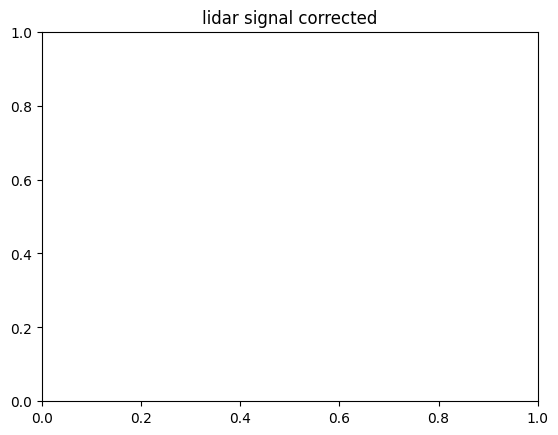

In [22]:
import tkinter as tk
#from tkinter import *
from tkinter import ttk
import tkinter.ttk

# Verificar depoisttkbootstrap para coisas mais bonitas
#import ttkbootstrap as ttk
#from ttkbootstrap.constants import *

from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure

import numpy as np

#directory = './data/monitor'
#temp_directory = './data/monitor/temp'


root = tkinter.Tk()
#root.wm_title("FAMES monitor")
#root.geometry("900x600")
root.title('FAMES monitor')

#s=ttk.Style()
#print(s.theme_names())
#('winnative', 'clam', 'alt', 'default', 'classic', 'vista', 'xpnative')

#s.theme_use('vista')

#file_path = tkinter.filedialog.askdirectory()

scale_var = tk.IntVar()

content = ttk.Frame(root)
#frame = tkinter.Frame(content, borderwidth=5, relief="ridge", width=600, height=400)

files_list = []
processed_files = []

content.grid(column=0, row=0, sticky=(tk.N, tk.S, tk.E, tk.W), padx=4, pady=4)


fig = Figure(figsize=(9, 5), dpi=100, layout='constrained')
#t = np.arange(0, 3, .01)
#fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))
dashboard = fames.report.create_simple_dashboard(fig)
fames.report.update_simple_dashboard(dashboard, dados)

canvas = FigureCanvasTkAgg(fig, content)  # A tk.DrawingArea.
canvas.draw()
#canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
canvas.get_tk_widget().grid(column=0, row=0, columnspan=4, sticky=(tk.N, tk.S, tk.E, tk.W))

#toolbar = NavigationToolbar2Tk(canvas, root)
#toolbar.update()
#canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)
#toolbar.grid


def on_key_press(event):
    print("you pressed {}".format(event.key))
    key_press_handler(event, canvas)


canvas.mpl_connect("key_press_event", on_key_press)



def _quit():
    root.quit()     # stops mainloop
    root.destroy()  # this is necessary on Windows to prevent
                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate


root.protocol("WM_DELETE_WINDOW", _quit)

#button = tkinter.Button(content, text="Quit", command=_quit)
#button.pack(side=tkinter.BOTTOM)
#button.grid(column=3 , row=1)
count = 0

def update_function():
    global dados
    global dashboard

    global count
    count = count + 1
   
    #background_actions_textbox.see(tk.END) #for auto  scrolling
    # sleep(5)
    # Procura por novos aquivos
    files = glob.glob(os.path.join(directory,'*'))
    new_file = False
    for file in files:
        if os.path.isfile(file):
            if file not in files_list:
               processed_file = os.path.join(temp_directory,os.path.basename(file) + '.fames')
               fames.files.process_licel(file, processed_file)
               files_list.append(file)
              #processed_files.append(processed_file)
               new_file = True

    if new_file:
        print(f'New file(s) found')
        #pega lista de arquivos fames
        processed_files = glob.glob(os.path.join(temp_directory,'*.fames'))  
        dados = fames.files.read_processed(processed_files)
        scale.configure(to=len(dados.index), tickinterval=len(dados.index)-1)
        # Plota
        global scale_var
        # mantem apresenetação de ultima aquisiacao
        #print(scale.get(), len(dados.index))
        if scale.get() == len(dados.index)-1:
            scale.set(len(dados.index))

        fames.report.update_simple_dashboard(dashboard, dados, scale_var.get() -1)
        canvas.draw()
   
   
    root.after(5000, update_function) # run itself again after 100 ms

def scaleevent(v):
    global dados
    global dashboard
    global scale_var
    fames.report.update_simple_dashboard(dashboard, dados, int(v) -1)
    #print(scale_var.get())
    canvas.draw()
    #print(v)
    variable = v

#length_label = tk.Label(content, text="Point").grid(row=1, column=1, sticky=(tk.E))

scale = tk.Scale(content, orient=tk.HORIZONTAL, length=100, from_=1, to=len(dados.index),  command=scaleevent, label="Measurment", tickinterval=len(dados.index)-1, variable=scale_var)
scale.grid(column=1, row=1, sticky=(tk.W))

labelText = tk.StringVar()

def _select_folder():
    global labelText
    folder_path = tkinter.filedialog.askdirectory()
    labelText.set("Monitoring {}".format(folder_path))

ttk.Button(content, text="Select Folder", command=_select_folder).grid(column=0, row=1)





label = ttk.Label(content, textvariable=labelText)
label.grid(column=0, row=2, sticky=(tk.W), columnspan=4)


#number_of_points = ttk.Label(content, text='Number of points: {}'.format(len(dados.index)))
#number_of_points.grid(column=1, row=1, sticky=(W))

root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)
content.columnconfigure(0, weight=3)
content.columnconfigure(1, weight=3)
content.columnconfigure(2, weight=3)
content.columnconfigure(3, weight=1)
content.rowconfigure(0, weight=1)
#content.rowconfigure(0, weight=1)


update_function()
tkinter.mainloop()
# If you put root.destroy() here, it will cause an error if the window is
# closed with the window manager.


# TTK

In [2]:
from tkinter import *
import asyncio
import threading
import random
import queue


class AsyncioThread(threading.Thread):
    def __init__(self, the_queue, max_data):
        self.asyncio_loop = asyncio.get_event_loop()
        self.the_queue = the_queue
        self.max_data = max_data
        threading.Thread.__init__(self)

    def run(self):
        self.asyncio_loop.run_until_complete(self.do_data())

    async def do_data(self):
        """ Creating and starting 'maxData' asyncio-tasks. """
        tasks = [
            self.create_dummy_data(key)
            for key in range(self.max_data)
        ]
        await asyncio.wait(tasks)

    async def create_dummy_data(self, key):
        """ Create data and store it in the queue. """
        sec = random.randint(1, 10)
        data = '{}:{}'.format(key, random.random())
        await asyncio.sleep(sec)

        self.the_queue.put((key, data))


class TheWindow:
    def __init__(self, max_data):
        # thread-safe data storage
        self.the_queue = queue.Queue()

        # the GUI main object
        self.root = Tk()

        # create the data variable
        self.data = []
        for key in range(max_data):
            self.data.append(StringVar())
            self.data[key].set('<default>')

        # Button to start the asyncio tasks
        Button(master=self.root,
               text='Start Asyncio Tasks',
               command=lambda: self.do_asyncio()).pack()
        # Frames to display data from the asyncio tasks
        for key in range(max_data):
            Label(master=self.root, textvariable=self.data[key]).pack()
        # Button to check if the GUI is freezed
        Button(master=self.root,
               text='Freezed???',
               command=self.do_freezed).pack()

    def refresh_data(self):
        """
        """
        # do nothing if the aysyncio thread is dead
        # and no more data in the queue
        if not self.thread.is_alive() and self.the_queue.empty():
            return

        # refresh the GUI with new data from the queue
        while not self.the_queue.empty():
            key, data = self.the_queue.get()
            self.data[key].set(data)

        print('RefreshData...')

        #  timer to refresh the gui with data from the asyncio thread
        self.root.after(1000, self.refresh_data)  # called only once!

    def do_freezed(self):
        """ Button-Event-Handler to see if a button on GUI works.
            The GOAL of this example is to make this button clickable
            while the other thread/asyncio-tasks are working. """
        print('Tkinter is reacting. Thread-ID: {}'
              .format(threading.get_ident()))

    def do_asyncio(self):
        """
            Button-Event-Handler starting the asyncio part in a separate
            thread.
        """
        # create Thread object
        self.thread = AsyncioThread(self.the_queue, len(self.data))

        #  timer to refresh the gui with data from the asyncio thread
        self.root.after(1000, self.refresh_data)  # called only once!

        # start the thread
        self.thread.start()


window = TheWindow(10)
window.root.mainloop()

Exception in thread Thread-7:
Traceback (most recent call last):
  File "c:\Users\JairoRotava\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\Users\JairoRotava\AppData\Local\Temp\ipykernel_19044\3738638742.py", line 16, in run
  File "c:\Users\JairoRotava\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 660, in run_until_complete
    self._check_running()
  File "c:\Users\JairoRotava\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 619, in _check_running
    raise RuntimeError('This event loop is already running')
RuntimeError: This event loop is already running
Exception in thread Thread-8:
Traceback (most recent call last):
  File "c:\Users\JairoRotava\AppData\Local\Programs\Python\Python312\Lib\threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "C:\Users\JairoRotava\AppData\Local\Temp\ipykernel_19044\3738638742.py", line 16, in run
  File "c:\Users\J

In [9]:
import tkinter as tk
import queue
import threading
import time

def runloop(thread_queue=None):
    result = 0
    for i in range(10):
        time.sleep(0.1)
        print(i)
        pass
        #Do something with result
    result = result + 1
    thread_queue.put(result)
class MainApp(tk.Tk):
    def __init__(self):
            ####### Do something ######
            super(MainApp,self).__init__()
            self.myframe = tk.Frame(self)
            self.myframe.grid(row=0, column=0, sticky='nswe')
            self.mylabel = tk.Label(self.myframe) # Element to be updated
            self.mylabel.config(text='No message')
            self.mylabel.grid(row=0, column=0)
            self.mybutton = tk.Button(
            self.myframe,
            text='Change message111',
            command=self.update_text)
            self.mybutton.grid(row=1, column=0)
    def update_text(self):
            self.mylabel.config(text='Running loop')
            self.thread_queue = queue.Queue()
            self.new_thread = threading.Thread(
            target=runloop,
            kwargs={'thread_queue':self.thread_queue})
            self.new_thread.start()
            self.after(100, self.listen_for_result)
    def listen_for_result(self):
            try:
                self.res = self.thread_queue.get(0)
                self.mylabel.config(text='Loop terminated')
            except queue.Empty:
                self.after(100, self.listen_for_result)

#if __name__ == "__main__":
#    main_app = MainApp()
#    main_app.mainloop()

main_app = MainApp()
main_app.mainloop()


0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [3]:
import tkinter as tk
from tkinter import ttk
import threading
import time

def long_running_task():
    for i in range(101):
        time.sleep(0.1) # Simulate a task taking time
        progress_var.set(i) # Update progress
        root.update_idletasks() # Refresh the GUI

def start_task():
    thread = threading.Thread(target=long_running_task)
    thread.start()

root = tk.Tk()
root.title('Task Simulator')
progress_var = tk.IntVar()
progress_bar = ttk.Progressbar(root, variable=progress_var, maximum=100)
progress_bar.pack(pady=20)
start_button = tk.Button(root, text='Start Task', command=start_task)
start_button.pack()
root.mainloop()

: 

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageFilter
import threading

def apply_filter(image_path):
    image = Image.open(image_path)
    filtered_image = image.filter(ImageFilter.BLUR) # Apply a filter
    filtered_image.show()

def open_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        thread = threading.Thread(target=apply_filter, args=(file_path,))
        thread.start()

root = tk.Tk()
root.title('Image Processing')
open_button = tk.Button(root, text='Open Image', command=open_image)
open_button.pack(pady=20)
root.mainloop()

In [2]:
import tkinter as tk
import tkinter.ttk as ttk
import threading
import time

class Window(tk.Tk):
    def __init__(this, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        this.threads = []
        this.var = tk.IntVar(value=0)

        this.label = ttk.Label(textvariable=this.var)
        this.button = ttk.Button(text='Start counter', command=this.startCounter)
        this.bind("<<increment_counter>>",this.increment_var)
        this.label.pack()
        this.button.pack()

        this.stop = False

        this.protocol("WM_DELETE_WINDOW", this.close)

    def startCounter(this):
        thread = threading.Thread(target=this.counter)
        this.threads.append(thread)
        thread.start()

    def increment_var(this, event):
        this.var.set(this.var.get() + 1)

    def counter(this):
        while True:
            time.sleep(0.0000001)  # drop the GIL momentarily
            if this.stop:
                print(f'self.stop = ')
                break
            this.event_generate("<<increment_counter>>")  # all increments happen in main thread

    def close(this):
        print('Stopping threads')
        this.stop = True

        this.waitThreads()

        print('Stopped threads')
        this.destroy()

    def waitThreads(this):
        for thread in this.threads:
            thread.join()

Window().mainloop()

Stopping threads
self.stop = 


: 

In [ ]:
Tkinter goes to great lengths internally so that you can make Tkinter calls from multiple threads by routing them to the main thread (the one that created the Tk instance). It mostly works, but not always. Despite all it tries to do, I highly recommend you make all Tkinter calls from a single thread.

If you need to communicate from another thread to the thread running Tkinter, keep it as simple as possible. Use event_generate to post a virtual event to the Tkinter event queue, and then bind to that event in your code.

root.event_generate("<<MyOwnEvent>>")

In [12]:
import tkinter as tk
from tkinter import ttk


class App(Tk):
	def __init__(self):
		super().__init__()

		# Title, icon, size
		self.title("Tkinter.com - Object Oriented Programming!")
		#self.iconbitmap('images/codemy.ico')
		self.geometry('700x450')

		# Create Status Variable
		self.status = True

		# Create some widgets
		self.my_label = tk.Label(self, text="Hello World!", font=("Helvetica", 42))
		self.my_label.pack(pady=20)

		self.my_button = tk.Button(self, text="Change Text", command=self.change)
		self.my_button.pack(pady=20)

		# Create a frame outside this function
		My_frame(self)

	def change(self):
		if self.status == True:
			self.my_label.config(text="Goodbye World!")
			self.status = False
		else:
			self.my_label.config(text="Hello World!")
			self.status = True

class My_frame(tk.Frame):
	def __init__(self, parent):
		super().__init__(parent)

		# Put this sucker on the screen
		self.pack(pady=20)
		# Create a few buttons
		self.my_button1 = tk.Button(self, text="Change", command=parent.change)
		self.my_button2 = tk.Button(self, text="Change", command=parent.change)
		self.my_button3 = tk.Button(self, text="Change", command=parent.change)

		self.my_button1.grid(row=0, column=0, padx=10)
		self.my_button2.grid(row=0, column=1, padx=10)
		self.my_button3.grid(row=0, column=2, padx=10)




# Define and instantiate our app
app = App()
app.mainloop()